In [45]:
import pandas as pd
import os
for i,j,k in os.walk('xls'):
    pass
dfs = []
cons = []
for i in k:
    df = pd.read_excel('xls\\'+i,header=2)
    dfs.append(df[4:37])
    dfs[-1] = dfs[-1].rename(columns={'Partner country':'partner'})
    cons.append(list(dfs[-1].columns)[2])


In [47]:
dfs[2].head()

,partner,Unnamed: 1,Sweden,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
4,Australia,NaN,19602498,30638683,18703245,39276888,18128310,45911851,7372352,19267292,7312805
5,Austria,NaN,151655864,154609544,154677392,125544040,139528905,169032926,190030732,186319953,135128698
6,Belgium,NaN,577336173,530946352,523988776,452114268,489318223,548260067,641153212,624175625,514698095
7,Canada,NaN,25393351,28851424,25112384,50804522,22718442,26916570,23258445,22442892,36008912
8,Chile,NaN,5843571,10793165,25387901,10107169,6743721,25736405,24169198,5629781,36062890


In [65]:
import numpy as np
matr = np.zeros((39,39))
index_dict = dict()
for i,j in enumerate(cons):
    index_dict[j] = i
for con, df in zip(cons,dfs):
    for partner in cons:
        query = np.array(df.query("partner == '{}'".format(partner)))
        print(query)
        qq = 0. if len(query)==0 or query[0][2]=='..' else query[0][2]
        matr[index_dict.get(con), index_dict.get(partner)] = qq

[]
[['Italy' nan 567997012 679271167 640619105 878192413 548940588 606466219
  811673883 621435582 593798715]]
[['Sweden' nan 203622086 222846638 175440864 186689981 156994655
  207555494 205434176 192926363 181673621]]
[['Chile' nan 518938956 615943467 730085397 682833070 509332943 553194031
  687981928 485383636 786444766]]
[['Spain' nan 269875291 216549283 251973018 321373004 257982852 239937431
  371254906 223448466 175508301]]
[['Israel' nan 48446000 47157000 57414000 59732000 56984000 79037000
  65874000 63153000 65290000]]
[['Korea' nan 2430299000 2732794000 2823109000 2839217000 2756571000
  2917182000 2992462000 3415319000 2663507000]]
[]
[['Austria' nan 183020882 130831361 146510359 173252031 125597144
  138048731 167238641 159070088 166073869]]
[['Norway' nan 63152435 68499972 61477340 63168720 146684359 91452532
  195504115 170396379 129550469]]
[['United States' nan 5050000000 5785200000 5660600000 5157400000
  5680000000 5515500000 5485900000 5786900000 5276900000]]
[['Un

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


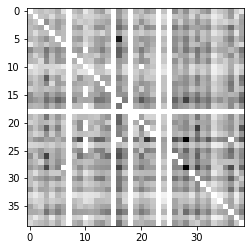

In [77]:
from matplotlib import pyplot as plt
plt.imshow(np.log(matr),cmap='gray')
plt.show()

In [79]:
print(cons[25])
dfs[25]

Colombia


,partner,Unnamed: 1,Colombia,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
4,Australia,NaN,4488763,5137457,2095590,9162784,2526487,1675667,5019677,2481583,1602348
5,Austria,NaN,13468778,20082504,15019863,12849084,13646127,14694378,16248270,9946941,14808671
6,Belgium,NaN,50623397,47324782,31591574,46123261,37292664,34991166,47788085,55779120,39053914
7,Canada,NaN,74342044,58313289,56813434,63934380,40167600,59008083,52706528,89149020,55966842
8,Chile,NaN,70688424,78344995,74366914,90412143,75712839,67508957,83193829,70782998,58220856
9,Czech Republic,NaN,4638032,3558006,3942249,2017349,2938447,3260701,2761991,3357554,5229605
10,Denmark,NaN,9518327,4880008,9337724,9300621,8553728,13564932,15148029,13599273,12435627
11,Estonia,NaN,333419,506941,462402,634173,51056,194346,289504,347176,344692
12,Finland,NaN,22725023,9296378,9887788,13000212,6760147,9364956,8742842,7074619,7468823
13,France,NaN,62305588,105840582,115497331,204598666,51083766,55579730,226806654,48401026,67009730
